A notebook to manually inspect dataset that is used to train SBR_Net model:
    - Qualitative and quantitative inspection of dataset (ground_truth, stack, and rfv)

Summary:


In [13]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import numpy as np

from tifffile import TiffFile
from data_loader import read_pq_file, TiffDataset

In [2]:
input_file_path = "/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/vasc/15/metadata.pq"
stack_path, rfv_path, truth_path = read_pq_file(input_file_path)

print("stack file path: ", stack_path, "\n")
print("rfv file path: ", rfv_path, "\n")
print("ground_truth path: ", truth_path, "\n")

stack file path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/vasc/15/stack_scattering/meas_276.tiff 

rfv file path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/vasc/15/rfv_scattering/meas_276.tiff 

ground_truth path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/synthetic_vasculature/gt_vasculature/Lnet_i_276.tiff 



Checking for:
1) Presence of NaNs in the data. If yes, their indices will be printed
2) array type, array dtype
3) min. and max. vals of the array

In [19]:
path_list = [stack_path, rfv_path, truth_path]
name_list = ["stack", "rfv", "ground_truth"]

for idx, path in enumerate(path_list):
    with TiffFile(path) as f:
        arr = f.asarray()

    arr_type = type(arr)
    arr_dtype = arr.dtype
    arr_shape = arr.shape

    if np.isnan(arr).any():
        nan_indices = np.argwhere(np.isnan(arr))
        print(f"{name_list[idx]} array contains NaNs at indices: {nan_indices}\n")
    else:
        print(f"{name_list[idx]} array contains no NaNs \n")

    print(f"arr_type of {name_list[idx]} is {arr_type}")
    print(f"arr_dtype of {name_list[idx]} is {arr_dtype}")
    print(f"arr_shape of {name_list[idx]} is {arr_shape}")
    print(f"min. value of {name_list[idx]} array is {arr.min()}")
    print(f"max. value of {name_list[idx]} array is {arr.max()}\n")


stack array contains no NaNs 

arr_type of stack is <class 'numpy.ndarray'>
arr_dtype of stack is uint16
arr_shape of stack is (9, 512, 512)
min. value of stack array is 0
max. value of stack array is 65534

rfv array contains no NaNs 

arr_type of rfv is <class 'numpy.ndarray'>
arr_dtype of rfv is uint16
arr_shape of rfv is (24, 512, 512)
min. value of rfv array is 0
max. value of rfv array is 65534

ground_truth array contains no NaNs 

arr_type of ground_truth is <class 'numpy.ndarray'>
arr_dtype of ground_truth is float64
arr_shape of ground_truth is (24, 512, 512)
min. value of ground_truth array is 0.0
max. value of ground_truth array is 254.0



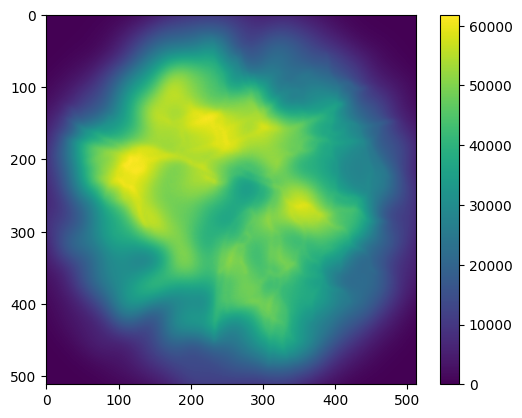

In [21]:
stack_img = plt.imread(stack_path)
plt.imshow(stack_img)
plt.colorbar()
plt.show()